Convert excel to csv

In [22]:
import os
import pandas as pd

# Define the folder containing the Excel files
folder_path = r"D:\Internship - Infosys\Project"

# Iterate through each file in the folder
for file_name in os.listdir(folder_path):
    # Check if the file is an Excel file (e.g., .xlsx or .xls)
    if file_name.endswith(".xlsx") or file_name.endswith(".xls"):
        # Construct full file path
        file_path = os.path.join(folder_path, file_name)
        
        # Read the Excel file into a DataFrame
        df = pd.read_excel(file_path)
        
        # Create the corresponding CSV file name
        csv_file_name = os.path.splitext(file_name)[0] + ".csv"
        csv_file_path = os.path.join(folder_path, csv_file_name)
        
        # Save the DataFrame as a CSV file
        df.to_csv(csv_file_path, index=False)
        
        print(f"Converted {file_name} to {csv_file_name}")

print("All Excel files have been converted to CSV.")


Converted dataset4.xlsx to dataset4.csv
Converted dataset5.xlsx to dataset5.csv
Converted dataset6.xlsx to dataset6.csv
Converted dataset7.xlsx to dataset7.csv
Converted dataset8.xlsx to dataset8.csv
Converted dataset9.xlsx to dataset9.csv
Converted dataset_1_2_3_combined.xlsx to dataset_1_2_3_combined.csv
All Excel files have been converted to CSV.


Check the headers rows with reference header

In [ ]:
# Define the folder containing the CSV files
folder_path = r"D:\Internship - Infosys\Project"

# Reference headers to compare
reference_headers = [
    "ID", "Name", "Role", "Transcript", "Resume", 
    "decision", "Reason for decision", 
    "Job Description", "num_words_in_transcript"
]

# Iterate through each CSV file in the folder
for file_name in os.listdir(folder_path):
    # Check if the file is a CSV file
    if file_name.endswith(".csv"):
        # Construct the full file path
        file_path = os.path.join(folder_path, file_name)
        
        # Read only the header row
        try:
            with open(file_path, 'r') as file:
                header_row = file.readline().strip().split(',')
            
            # Compare with the reference headers
            if header_row != reference_headers:
                print(f"\nHeader mismatch in file: {file_name}")
                print("File Headers: ", header_row)
                print("Reference Headers: ", reference_headers)
            else:
                print(f"Headers match for file: {file_name}")
        
        except Exception as e:
            print(f"Error reading file {file_name}: {e}")

print("\nHeader comparison completed.")



Header mismatch in file: dataset4.csv
File Headers:  ['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision', 'Reason for decision', 'Job Description']
Reference Headers:  ['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision', 'Reason for decision', 'Job Description', 'num_words_in_transcript']

Header mismatch in file: dataset5.csv
File Headers:  ['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision', 'Reason for decision', 'Job Description']
Reference Headers:  ['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision', 'Reason for decision', 'Job Description', 'num_words_in_transcript']

Header mismatch in file: dataset6.csv
File Headers:  ['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision', 'Reason for decision', 'Job Description']
Reference Headers:  ['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision', 'Reason for decision', 'Job Description', 'num_words_in_transcript']

Header mismatch in file: dataset7.csv
File Headers:  ['ID', 'Name', 'Role', 'Transcript', 

Convert all text to lowercase

In [24]:
from transformers import BertTokenizer

# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def convert_text_to_lowercase_bert(text):
    # Tokenize the text and convert it to lowercase
    tokens = tokenizer.tokenize(text)  # Tokenizing the input text
    lowercased_tokens = [token.lower() for token in tokens]  # Convert tokens to lowercase
    lowercased_text = tokenizer.convert_tokens_to_string(lowercased_tokens)  # Convert tokens back to text
    return lowercased_text

def convert_csv_to_lowercase_using_bert(folder_path):
    # Loop through all CSV files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, file_name)
            print(f"Processing file: {file_name}")

            # Read the CSV file into a pandas DataFrame
            df = pd.read_csv(file_path)

            # Apply the BERT-based lowercase conversion to each string cell
            for col in df.select_dtypes(include=['object']).columns:  # Only process string columns
                df[col] = df[col].apply(convert_text_to_lowercase_bert)

            # Save the modified DataFrame back to the CSV
            df.to_csv(file_path, index=False)
            print(f"File '{file_name}' converted to lowercase using BERT!")

# Specify the folder containing the CSV files
folder_path = "D:\Internship - Infosys\Project"
convert_csv_to_lowercase_using_bert(folder_path)


Processing file: dataset4.csv
File 'dataset4.csv' converted to lowercase using BERT!
Processing file: dataset5.csv
File 'dataset5.csv' converted to lowercase using BERT!
Processing file: dataset6.csv
File 'dataset6.csv' converted to lowercase using BERT!
Processing file: dataset7.csv
File 'dataset7.csv' converted to lowercase using BERT!
Processing file: dataset8.csv
File 'dataset8.csv' converted to lowercase using BERT!
Processing file: dataset9.csv
File 'dataset9.csv' converted to lowercase using BERT!
Processing file: dataset_1_2_3_combined.csv
File 'dataset_1_2_3_combined.csv' converted to lowercase using BERT!


Add num_words_in_transcript in the data and find it

In [ ]:
import spacy
import re

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

# Define the folder containing the CSV files
folder_path = r"D:\Internship - Infosys\Project"

# Function to clean and calculate word count using SpaCy tokenizer
def get_word_count(text):
    # Handle empty text or NaN
    if not text or pd.isna(text):
        return 0
    
    # Remove unwanted punctuation like ellipses (...) and other non-word characters
    text = re.sub(r'[^\w\s]', '', text)  # Removes punctuation like periods, commas, etc.
    
    # Ensure the input is a string and tokenize it
    doc = nlp(str(text))
    
    # Count all non-punctuation, non-whitespace tokens, and include contractions as single words
    word_count = len([token.text for token in doc if token.is_alpha and len(token.text) > 0])
    
    return word_count

# Iterate through each CSV file and process
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(folder_path, file_name)
        
        try:
            # Load CSV into DataFrame
            df = pd.read_csv(file_path)
            
            # Ensure 'num_words_in_transcript' column is added
            if "num_words_in_transcript" not in df.columns:
                if "Transcript" in df.columns:
                    # Apply the word count function to each row of the 'Transcript' column
                    df["num_words_in_transcript"] = df["Transcript"].apply(lambda x: get_word_count(x) if pd.notna(x) else 0)
                else:
                    # If 'Transcript' column is missing, add NaN values
                    df["num_words_in_transcript"] = pd.NA

                # Save the updated DataFrame back to the file
                df.to_csv(file_path, index=False)
                print(f"Added 'num_words_in_transcript' column to {file_name}")
            else:
                print(f"'num_words_in_transcript' column already exists in {file_name}")
        
        except Exception as e:
            print(f"Error processing file {file_name}: {e}")

print("\nProcessing completed.")


Added 'num_words_in_transcript' column to dataset4.csv
Added 'num_words_in_transcript' column to dataset5.csv
Added 'num_words_in_transcript' column to dataset6.csv
Added 'num_words_in_transcript' column to dataset7.csv
Added 'num_words_in_transcript' column to dataset8.csv
Added 'num_words_in_transcript' column to dataset9.csv
'num_words_in_transcript' column already exists in dataset_1_2_3_combined.csv

Processing completed.


Update the decision column

In [26]:
def process_decision_column_in_folder(folder_path):
    # Get all CSV files in the folder
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    # Loop through each CSV file
    for csv_file in csv_files:
        # Construct the full path to the file
        file_path = os.path.join(folder_path, csv_file)

        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)

        # Replace 'selected' -> 'select' and 'rejected' -> 'reject' in the 'decision' column
        df['decision'] = df['decision'].replace({'selected': 'select', 'rejected': 'reject'})

        # Save the modified DataFrame back to CSV (overwriting the original or saving as new)
        df.to_csv(file_path, index=False)  # Overwrites the original file
        # Or you can save it as a new file if you prefer:
        # df.to_csv(f'processed_{csv_file}', index=False)

        print(f"Processed {csv_file} and updated 'decision' column.")

# Example usage:
folder_path = 'D:\Internship - Infosys\Project'  # Replace with your actual folder path
process_decision_column_in_folder(folder_path)


Processed dataset4.csv and updated 'decision' column.
Processed dataset5.csv and updated 'decision' column.
Processed dataset6.csv and updated 'decision' column.
Processed dataset7.csv and updated 'decision' column.
Processed dataset8.csv and updated 'decision' column.
Processed dataset9.csv and updated 'decision' column.
Processed dataset_1_2_3_combined.csv and updated 'decision' column.


Concatinate all the dataset to a single dataset

In [27]:
import os
import pandas as pd

def concatenate_datasets_from_folder(folder_path):
    # Initialize an empty list to store the dataframes
    dataframes = []

    # Get all CSV files in the folder
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    # Loop through each CSV file
    for csv_file in csv_files:
        # Construct the full path to the file
        file_path = os.path.join(folder_path, csv_file)

        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)

        # Append the DataFrame to the list
        dataframes.append(df)

    # Concatenate all the dataframes into one single dataframe
    combined_df = pd.concat(dataframes, ignore_index=True)

    return combined_df

# Example usage:
folder_path = 'D:\Internship - Infosys\Project'  # Replace with your actual folder path

# Get the combined dataset
final_combined_df = concatenate_datasets_from_folder(folder_path)

# Display the final concatenated DataFrame
print(final_combined_df)
final_combined_df.to_csv('combined_dataset.csv', index=False)


             ID              Name               Role  \
0       uppaup1       alice smith  software engineer   
1       uppaup2        hank brown  software engineer   
2       uppaup3         bob jones     data scientist   
3       uppaup4        bob miller  software engineer   
4       uppaup5         ivy jones      data engineer   
...         ...               ...                ...   
3169   ananba44     ananya bansal      data engineer   
3170  diyasi576        diya singh    product manager   
3171  harska507  harshitha kapoor        ui engineer   
3172  kabich225      kabir chopra  software engineer   
3173  aditsi182      aditya singh  software engineer   

                                             Transcript  \
0     here ' s a simulated interview for a software ...   
1     here ' s a simulated interview for a software ...   
2     here ' s a simulated interview for a data scie...   
3     here ' s a simulated interview for a software ...   
4     here ' s a simulated inter

Descriptive Statistics

Numerical Features -> num_words_in_transcript

In [39]:

def load_and_aggregate(file_name):
    aggregated_dfs = []  # List to hold all aggregated DataFrames
    
    # Loop through all files in the folder
    df = pd.read_csv(file_name)  # Read the CSV file
            
            # Perform the aggregation on the DataFrame
    aggregated_df = df[['num_words_in_transcript', 'decision', 'Role']].groupby(['Role', 'decision']).agg(
    mean=('num_words_in_transcript', 'mean'),
    median=('num_words_in_transcript', 'median'),
    std=('num_words_in_transcript', 'std'),
    min=('num_words_in_transcript', 'min'),
    max=('num_words_in_transcript', 'max')
    ).reset_index()
            
    aggregated_dfs.append(aggregated_df)  # Add to the list
    
    # Concatenate all DataFrames in the list into a single DataFrame
    combined_df = pd.concat(aggregated_dfs, ignore_index=True)
    
    return combined_df

# Usage
file_name = 'combined_dataset.csv'  # Replace with your actual folder path
result = load_and_aggregate(file_name)

# Convert the result to a DataFrame (it already is a DataFrame)
result_df = pd.DataFrame(result)


result_df.to_csv('aggregate.csv')

In [40]:
result_df

,Role,decision,mean,median,std,min,max
0,ai engineer,reject,593.200000,583.0,18.294808,578,616
1,ai engineer,select,688.625000,712.0,208.539779,380,977
2,business analyst,reject,635.800000,603.0,107.899027,540,818
3,business analyst,select,721.833333,722.5,55.718638,649,813
4,cloud architect,reject,615.500000,646.5,79.743338,499,670
5,cloud architect,select,827.000000,819.5,24.832774,807,862
6,content writer,reject,558.333333,560.0,71.514567,486,629
7,content writer,select,709.500000,709.5,36.062446,684,735
8,cybersecurity specialist,reject,659.666667,630.0,128.570085,552,897
9,cybersecurity specialist,select,723.666667,688.0,82.500505,665,818


Categorical Features -> Role

                            Role  Frequency
0                 data scientist        579
1              software engineer        532
2                product manager        506
3                  data engineer        499
4                    ui engineer        279
5                   data analyst        261
6                    ui designer        226
7             software developer         66
8                project manager         56
9               network engineer         16
10               devops engineer         16
11              graphic designer         15
12  digital marketing specialist         14
13     machine learning engineer         13
14                   ai engineer         13
15                 hr specialist         12
16              business analyst         11
17                game developer         10
18      cybersecurity specialist          9
19        database administrator          9
20               cloud architect          8
21              ui / ux designer

<Figure size 1000x600 with 0 Axes>

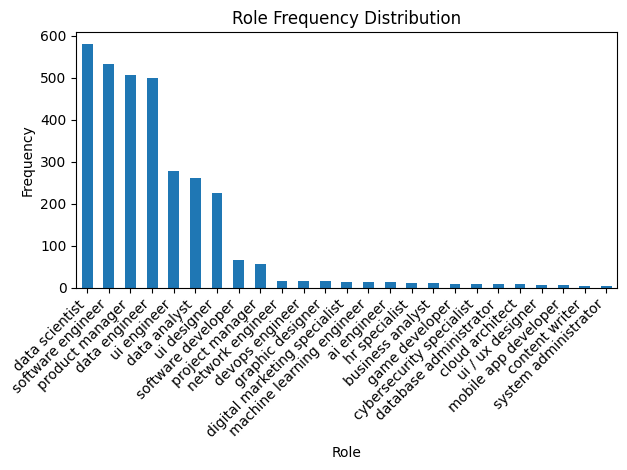

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to load data and calculate role frequency distribution
def calculate_role_frequency(file_name):
    # Read the CSV file
    df = pd.read_csv(file_name)
    
    # Count the frequency of each role
    role_count = df['Role'].value_counts()
    
    # Convert the series into a DataFrame for easier handling
    role_frequency_df = role_count.reset_index()
    role_frequency_df.columns = ['Role', 'Frequency']
    
    return role_frequency_df

# Usage
file_name = 'combined_dataset.csv'  # Replace with your actual file path
role_frequency_df = calculate_role_frequency(file_name)

# Display the frequency distribution as a table
print(role_frequency_df)

# Plot the frequency distribution
plt.figure(figsize=(10, 6))
role_frequency_df.sort_values(by='Frequency', ascending=False).plot(kind='bar', x='Role', y='Frequency', legend=False)
plt.title('Role Frequency Distribution')
plt.xlabel('Role')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Transcript Sentiment

Sentiment  Negative  Positive
decision                     
reject          1.0    1608.0
select          0.0    1565.0


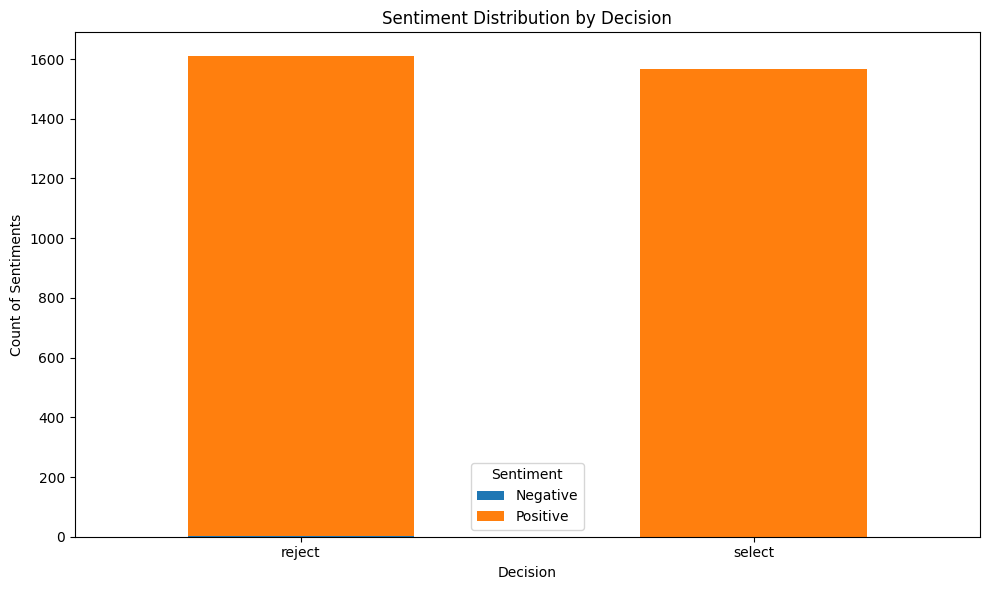

In [47]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Function to perform sentiment analysis
def perform_sentiment_analysis(df, transcript_column='Transcript'):
    # Initialize the SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()
    
    # Apply sentiment analysis to the 'Transcript' column
    df['Sentiment Score'] = df[transcript_column].apply(lambda x: sia.polarity_scores(str(x))['compound'])
    
    # Categorize the sentiment into Positive, Negative, and Neutral
    df['Sentiment'] = df['Sentiment Score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
    
    return df

# Function to analyze sentiment distribution based on decision
def analyze_sentiment_by_decision(file_name):
    # Read the CSV file
    df = pd.read_csv(file_name)
    
    # Perform sentiment analysis on the Transcript column
    df = perform_sentiment_analysis(df)
    
    # Group by Decision and Sentiment to count occurrences
    sentiment_by_decision = df.groupby(['decision', 'Sentiment']).size().unstack().fillna(0)
    
    return df, sentiment_by_decision

# Usage
file_name = 'combined_dataset.csv'  # Replace with your actual file path
df, sentiment_by_decision = analyze_sentiment_by_decision(file_name)

# Display sentiment analysis result by decision
print(sentiment_by_decision)

# Plot sentiment distribution by decision
sentiment_by_decision.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution by Decision')
plt.xlabel('Decision')
plt.ylabel('Count of Sentiments')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


The vast majority of transcripts are classified as having a positive sentiment, with very few classified as negative sentiment, and no neutral sentiment at all.

[nltk_data] Downloading package stopwords to C:\Users\Durgesh
[nltk_data]     Babu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


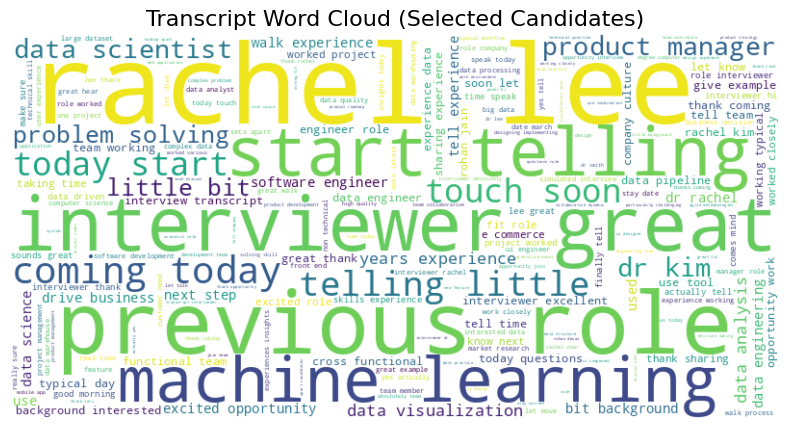

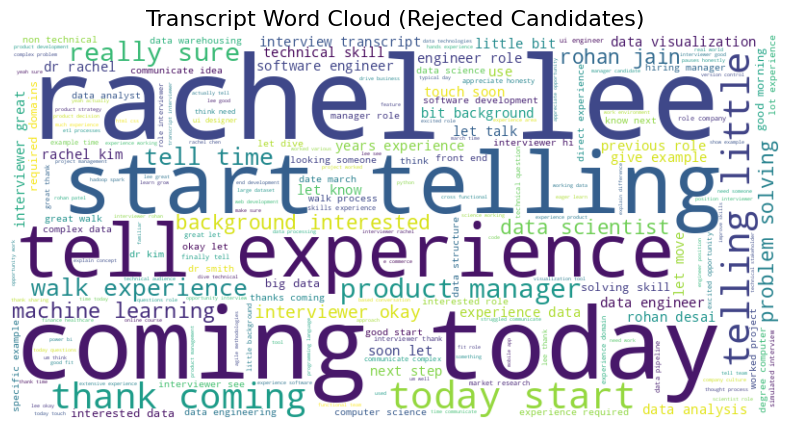

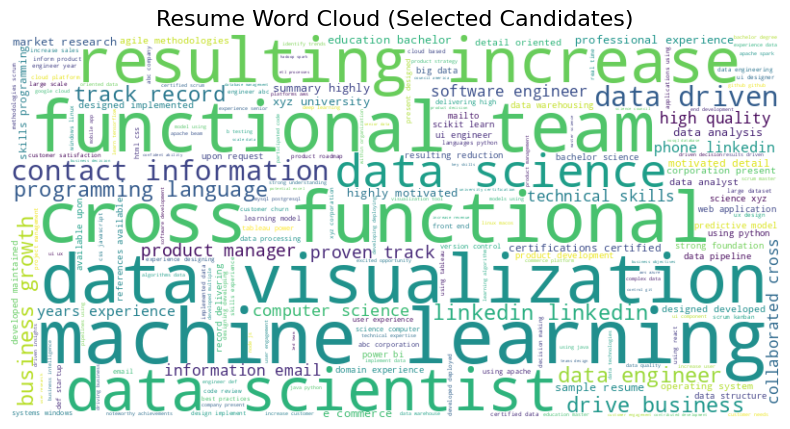

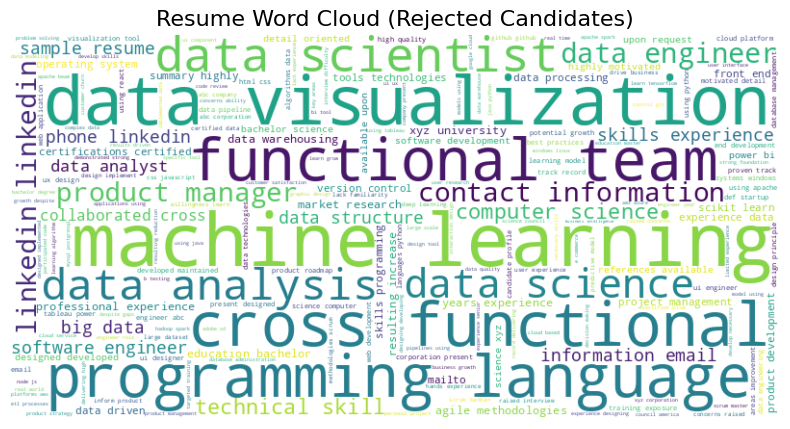

In [51]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

# Ensure NLTK stopwords are downloaded
nltk.download('stopwords')

# Function to preprocess text
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    # Remove stop words, convert to lowercase, and remove non-alphabetic characters
    return ' '.join(word.lower() for word in str(text).split() if word.lower() not in stop_words and word.isalpha())

# Function to generate word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Function to create word clouds for selected and rejected candidates
def create_word_clouds(file_name):
    # Load data
    df = pd.read_csv(file_name)

    # Preprocess text columns
    df['Transcript Cleaned'] = df['Transcript'].apply(preprocess_text)
    df['Resume Cleaned'] = df['Resume'].apply(preprocess_text)

    # Split data by decision
    selected = df[df['decision'] == 'select']
    rejected = df[df['decision'] == 'reject']

    # Generate word clouds for each group and column
    for column, title_prefix in [('Transcript Cleaned', 'Transcript'), ('Resume Cleaned', 'Resume')]:
        generate_word_cloud(' '.join(selected[column]), f'{title_prefix} Word Cloud (Selected Candidates)')
        generate_word_cloud(' '.join(rejected[column]), f'{title_prefix} Word Cloud (Rejected Candidates)')

# Usage
file_name = 'combined_dataset.csv'  # Replace with the path to your dataset
create_word_clouds(file_name)


The transcript of selected students has the words like {experience, previous role, skills, tools, problem solving and the words that are more related to the job}
The transcript of rejected students has only the normal verbal words which are not related to industry. This also shows that the candidate only knows about the title of job role and not much about it
In Resume, the selected candidate has given more skillsets in the resume than the rejected candidate 

In [55]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
df = pd.read_csv('combined_dataset.csv')  # Replace with your dataset path

# Function to calculate cultural fit score
def calculate_cultural_fit(df):
    # Extract relevant columns
    transcripts = df['Transcript'].fillna('')  # Candidate responses
    job_descriptions = df['Job Description'].fillna('')  # Role expectations

    # Initialize TF-IDF Vectorizer
    vectorizer = TfidfVectorizer(stop_words='english')

    # Combine both columns for TF-IDF training
    all_texts = pd.concat([transcripts, job_descriptions], axis=0)
    tfidf_matrix = vectorizer.fit_transform(all_texts)

    # Split back into transcripts and job descriptions
    transcripts_tfidf = tfidf_matrix[:len(transcripts)]
    job_descriptions_tfidf = tfidf_matrix[len(transcripts):]

    # Calculate cosine similarity between transcripts and job descriptions
    similarity_scores = []
    for i in range(len(transcripts)):
        similarity = cosine_similarity(transcripts_tfidf[i], job_descriptions_tfidf[i])
        similarity_scores.append(similarity[0][0])

    # Add the scores to the DataFrame
    df['Cultural_Fit_Score'] = similarity_scores

    return df

# Calculate the cultural fit score
df_with_scores = calculate_cultural_fit(df)

# Save the result
df_with_scores.to_csv('cultural_fit_scores.csv', index=False)

# Print sample output
print(df_with_scores[['Role', 'Cultural_Fit_Score', 'decision']].head())


                Role  Cultural_Fit_Score decision
0  software engineer            0.156612   reject
1  software engineer            0.167583   select
2     data scientist            0.186347   reject
3  software engineer            0.222087   select
4      data engineer            0.266225   reject


C:\Users\Durgesh Babu\AppData\Local\Temp\ipykernel_16676\570331758.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_scores, x='decision', y='Cultural_Fit_Score', palette='Set2')


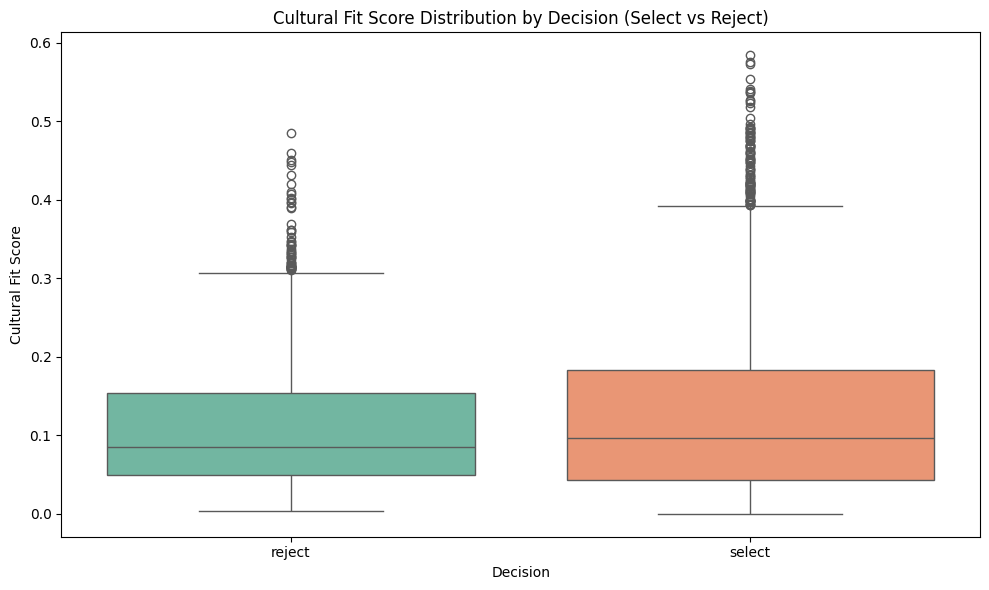

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the cultural fit score for selected vs rejected candidates
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_with_scores, x='decision', y='Cultural_Fit_Score', palette='Set2')
plt.title('Cultural Fit Score Distribution by Decision (Select vs Reject)')
plt.xlabel('Decision')
plt.ylabel('Cultural Fit Score')
plt.tight_layout()
plt.show()


There are many outliers in the box plot. This explains the irregular cultural_fit_score for the decision

In [58]:
# Group by decision and calculate mean and median of cultural fit scores
stats = df_with_scores.groupby('decision')['Cultural_Fit_Score'].agg(['mean', 'median'])
print(stats)


              mean    median
decision                    
reject    0.111165  0.085081
select    0.134640  0.096881


In [59]:
from scipy.stats import ttest_ind

# Separate the scores for "select" and "reject" candidates
select_scores = df_with_scores[df_with_scores['decision'] == 'select']['Cultural_Fit_Score']
reject_scores = df_with_scores[df_with_scores['decision'] == 'reject']['Cultural_Fit_Score']

# Perform the t-test
t_stat, p_value = ttest_ind(select_scores, reject_scores)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
""

T-statistic: 6.438083220608945
P-value: 1.392656520104574e-10


''

The difference in cultural fit scores between candidates who are selected and those who are rejected is statistically significant. Since the p-value is very small (much less than the typical threshold of 0.05), we can reject the null hypothesis.  A higher t-statistic suggests a larger difference between the two groups.

             ID              Name               Role  jaccard_job_resume  \
0       uppaup1       alice smith  software engineer            0.228833   
1       uppaup2        hank brown  software engineer            0.147799   
2       uppaup3         bob jones     data scientist            0.251834   
3       uppaup4        bob miller  software engineer            0.229592   
4       uppaup5         ivy jones      data engineer            0.226562   
...         ...               ...                ...                 ...   
3169   ananba44     ananya bansal      data engineer            0.085561   
3170  diyasi576        diya singh    product manager            0.095238   
3171  harska507  harshitha kapoor        ui engineer            0.097561   
3172  kabich225      kabir chopra  software engineer            0.090909   
3173  aditsi182      aditya singh  software engineer            0.069388   

      jaccard_job_transcript decision  
0                   0.171946   reject  
1      

In [71]:
import pandas as pd


df = pd.read_csv('cultural_fit_scores.csv')

# Step 1: Group by 'Role' and 'decision', and calculate the min, mean, median of the 'Cultural Fit Score'
grouped_df = df.groupby(['Role', 'decision'])['Cultural_Fit_Score'].agg(['min', 'mean', 'median'])

# Step 2: Reset index to convert multi-level indices into columns
grouped_df = grouped_df.reset_index()

# Step 3: Pivot the table so that 'decision' values become separate columns
pivot_df = grouped_df.pivot_table(index='Role', columns='decision', values=['min', 'mean', 'median'])

# Step 4: Flatten the multi-level columns resulting from pivot
pivot_df.columns = [f'{stat}_{decision}' for stat, decision in pivot_df.columns]

# Step 5: Print the final DataFrame
data = pd.DataFrame(pivot_df)
data


,mean_reject,mean_select,median_reject,median_select,min_reject,min_select
Role,,,,,,
ai engineer,0.181353,0.298865,0.174775,0.318901,0.134299,0.173723
business analyst,0.176534,0.262594,0.179859,0.275296,0.128007,0.190217
cloud architect,0.319751,0.368239,0.313088,0.362809,0.243230,0.298558
content writer,0.403656,0.493132,0.432141,0.493132,0.330503,0.412817
cybersecurity specialist,0.186207,0.347482,0.151037,0.335344,0.123955,0.298023
data analyst,0.055167,0.055139,0.049726,0.046421,0.011617,0.003219
data engineer,0.126165,0.162612,0.097933,0.106616,0.015242,0.000000
data scientist,0.102150,0.118957,0.092714,0.101189,0.012344,0.003111
database administrator,0.309179,0.355102,0.327150,0.378789,0.256601,0.261953


Roles like data analyst and software engineer show smaller mean differences between selected and rejected candidates, suggesting that candidates with varying levels of Cultural Fit can still be selected.
For most roles, the mean is higher than the median, which might indicate a skewed distribution
The minimum for selected candidates in data analyst role is extremely low (0.003219), suggesting that even candidates with very low Cultural Fit Scores are sometimes selected.
Higher Cultural Fit Scores seem to play a stronger role in selection decisions for certain roles

In [80]:
import pandas as pd

combined_dataset = pd.read_csv('cultural_fit_scores.csv')
# Step 1: Calculate the length of Transcript and Resume
combined_dataset['Transcript Length'] = combined_dataset['Transcript'].apply(lambda x: len(x.split()))
combined_dataset['Resume Length'] = combined_dataset['Resume'].apply(lambda x: len(x.split()))

# Step 2: Calculate the Transcript Length to Resume Length Ratio
combined_dataset['Transcript to Resume Length Ratio'] = combined_dataset['Transcript Length'] / combined_dataset['Resume Length']

# Step 3: Calculate Cultural Fit Score to Transcript/Resume Length Ratio
combined_dataset['Cultural Fit to Transcript Length Ratio'] = combined_dataset['Cultural_Fit_Score'] / combined_dataset['Transcript Length']
combined_dataset['Cultural Fit to Resume Length Ratio'] = combined_dataset['Cultural_Fit_Score'] / combined_dataset['Resume Length']

# Step 4: Correlation with Selection Decision (selected = 1, rejected = 0)
# Assuming 'decision' is the column with selection results (1 = selected, 0 = rejected)
decision_map = {'select': 1, 'reject': 0}
combined_dataset['decision_numeric'] = combined_dataset['decision'].map(decision_map)

# Step 5: Calculate correlation for the ratios with the decision
correlations = combined_dataset[['Transcript to Resume Length Ratio', 'Cultural Fit to Transcript Length Ratio', 'Cultural Fit to Resume Length Ratio', 'decision_numeric']].corr()

# Display the correlations
data = pd.DataFrame(correlations)
data


,Transcript to Resume Length Ratio,Cultural Fit to Transcript Length Ratio,Cultural Fit to Resume Length Ratio,decision_numeric
Transcript to Resume Length Ratio,1.000000,-0.030853,0.630458,0.068435
Cultural Fit to Transcript Length Ratio,-0.030853,1.000000,0.605333,0.028237
Cultural Fit to Resume Length Ratio,0.630458,0.605333,1.000000,0.088295
decision_numeric,0.068435,0.028237,0.088295,1.000000


The correlations with decision_numeric are all weak, suggesting that Cultural Fit relative to length and Transcript to Resume Length Ratio have a minor role in the final decision-making process.

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load your dataset
df = pd.read_csv('combined_dataset.csv')

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Function to compute cosine similarity between two texts
def compute_cosine_similarity(text1, text2):
    tfidf_matrix = vectorizer.fit_transform([text1, text2])
    return cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]

# Add similarity columns
df['resume_jd_similarity'] = df.apply(lambda row: compute_cosine_similarity(row['Resume'], row['Job Description']), axis=1)
df['resume_transcript_similarity'] = df.apply(lambda row: compute_cosine_similarity(row['Resume'], row['Transcript']), axis=1)

# Save the results to a new CSV file
df.to_csv('model.csv', index=False)

print("The model.csv file has been saved with similarity scores.")


The model.csv file has been saved with similarity scores.


In [4]:
import pandas as pd
from textblob import TextBlob

# Load your dataset
df = pd.read_csv('model.csv')

# Function to get the sentiment polarity and sentiment label
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity  # Polarity score (-1 to 1)
    
    # Sentiment label based on polarity
    if polarity > 0:
        sentiment = 'Positive'
    elif polarity < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    
    return sentiment, polarity

# Apply the function to 'Resume' and 'Transcript' columns
df['resume_sentiment'], df['resume_polarity'] = zip(*df['Resume'].apply(get_sentiment))
df['transcript_sentiment'], df['transcript_polarity'] = zip(*df['Transcript'].apply(get_sentiment))

# Save the results to a new CSV file
df.to_csv('model.csv', index=False)

print("The model_with_sentiment.csv file has been saved with sentiment analysis and polarity scores.")


The model_with_sentiment.csv file has been saved with sentiment analysis and polarity scores.
